# Análisis predictivo del Alzheimer
Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje autimático capaz de predecir la probabilidad de que un paciente padezca alzheimer, basandose en diversas características

**Objetivo :** 

**¿Porque es relevante este estudio ?**

**Enfoque:**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer
from xgboost import XGBClassifier
import xgboost as xgb

#!pip install xgboost
# pip install category_encoders
##!pip install plotly


## 1. Obtención y exploración de Datos 

In [2]:
ruta = "Data/alzheimers_prediction_dataset.csv"
df = pd.read_csv(ruta,encoding='utf-8', sep=",")
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [4]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [5]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [6]:
print(df['Alzheimer’s Diagnosis'].value_counts())


Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


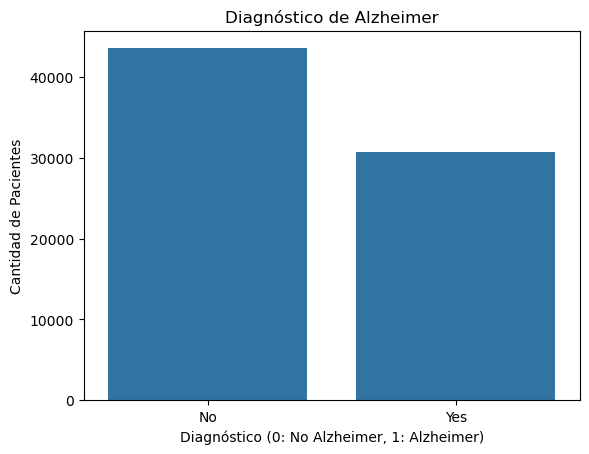

In [7]:
sns.countplot(x=df['Alzheimer’s Diagnosis'])
plt.title('Diagnóstico de Alzheimer')
plt.xlabel('Diagnóstico (0: No Alzheimer, 1: Alzheimer)')
plt.ylabel('Cantidad de Pacientes')
plt.show()

## 2. Limpieza y preprocesamiento
Nuestro dataset tiene tanto variables categóricas como variables numericas, debido a esto es necesario aplicar un preprocesamiento de la data

### 2.1 Conversión de variables categóricas

En este paso vamos a convertir esta variables categoricas a valores numerico que pueda entender la computadora. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [9]:

print(df.columns)

""" print("Country\n",df['Country'].unique())
print("\nEducation Level\n",df['Education Level'].unique())
print("\nPhysical Activity Level\n", df['Physical Activity Level'].unique())
print("\nSmoking Status\n", df['Smoking Status'].unique())
print("\nAlcohol Consumption\n", df['Alcohol Consumption'].unique())
print("\nDiabetes\n", df['Diabetes'].unique())
print("\nHypertension\n", df['Hypertension'].unique())
print("\nCholesterol Level\n", df['Cholesterol Level'].unique())
print("\nFamily History of Alzheimer’s\n", df['Family History of Alzheimer’s'].unique())
print("\nDepression Level\n", df['Depression Level'].unique())
print("\nSleep Quality\n", df['Sleep Quality'].unique())
print("\nDietary Habits\n", df['Dietary Habits'].unique())
print("\nAir Pollution Exposure\n", df['Air Pollution Exposure'].unique())
print("\nEmployment Status\n", df['Employment Status'].unique())
print("\nMarital Status\n", df['Marital Status'].unique())
print("\nGenetic Risk Factor (APOE-ε4 allele)\n", df['Genetic Risk Factor (APOE-ε4 allele)'].unique())
print("\nSocial Engagement Level\n", df['Social Engagement Level'].unique())
print("\nIncome Level\n", df['Income Level'].unique())
print("\nStress Levels\n", df['Stress Levels'].unique())
print("\nUrban vs Rural Living\n", df['Urban vs Rural Living'].unique())
 """

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')


' print("Country\n",df[\'Country\'].unique())\nprint("\nEducation Level\n",df[\'Education Level\'].unique())\nprint("\nPhysical Activity Level\n", df[\'Physical Activity Level\'].unique())\nprint("\nSmoking Status\n", df[\'Smoking Status\'].unique())\nprint("\nAlcohol Consumption\n", df[\'Alcohol Consumption\'].unique())\nprint("\nDiabetes\n", df[\'Diabetes\'].unique())\nprint("\nHypertension\n", df[\'Hypertension\'].unique())\nprint("\nCholesterol Level\n", df[\'Cholesterol Level\'].unique())\nprint("\nFamily History of Alzheimer’s\n", df[\'Family History of Alzheimer’s\'].unique())\nprint("\nDepression Level\n", df[\'Depression Level\'].unique())\nprint("\nSleep Quality\n", df[\'Sleep Quality\'].unique())\nprint("\nDietary Habits\n", df[\'Dietary Habits\'].unique())\nprint("\nAir Pollution Exposure\n", df[\'Air Pollution Exposure\'].unique())\nprint("\nEmployment Status\n", df[\'Employment Status\'].unique())\nprint("\nMarital Status\n", df[\'Marital Status\'].unique())\nprint("\nGen

In [10]:
#Variables categóricas Nominales (Sin orden específico)
#One-Hot Encoding: Para variables con pocas categorías

cols=['Gender','Diabetes','Hypertension','Employment Status','Marital Status','Urban vs Rural Living']
df = pd.get_dummies(df, columns=cols, drop_first=True)


# Variables categiricas Ordinales (Orden específico)
df['Cholesterol Level'] = df['Cholesterol Level'].map({'Normal': 0, 'High': 1})
df['Family History of Alzheimer’s'] = df['Family History of Alzheimer’s'].map({'No': 0, 'Yes': 1})
df['Genetic Risk Factor (APOE-ε4 allele)'] = df['Genetic Risk Factor (APOE-ε4 allele)'].map({'No': 0, 'Yes': 1})


df['Physical Activity Level'] = df['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Smoking Status'] = df['Smoking Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Never': 0, 'Occasionally': 1, 'Regularly': 2})
df['Depression Level'] = df['Depression Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sleep Quality'] = df['Sleep Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
df['Air Pollution Exposure'] = df['Air Pollution Exposure'].map({ 'Low':0 ,'Medium':1,'High':2})
df['Social Engagement Level'] = df['Social Engagement Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Stress Levels'] = df['Stress Levels'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Income Level'] = df['Income Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Clonaremos la data actual en otro espacio de memoría
df2 = df.copy(deep=1)

# Aplicar Target Encoding a 'Country' 
df['Alzheimer’s Diagnosis'] = df['Alzheimer’s Diagnosis'].map({'No': 0, 'Yes': 1}) #¡Target de la data!
target_enc = TargetEncoder()
df['Country'] = target_enc.fit_transform(df['Country'],df['Alzheimer’s Diagnosis'])

df.head()

,Country,Age,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,...,Stress Levels,Alzheimer’s Diagnosis,Gender_Male,Diabetes_Yes,Hypertension_Yes,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Single,Marital Status_Widowed,Urban vs Rural Living_Urban
0,0.399946,90,1,33.0,1,0,1,0,0,90,...,2,0,True,False,False,True,False,True,False,True
1,0.402037,72,7,29.9,1,1,0,0,0,65,...,2,0,True,False,False,False,True,False,True,True
2,0.495213,86,19,22.9,2,2,1,0,0,43,...,2,0,False,False,True,False,False,True,False,False
3,0.386414,53,17,31.2,0,0,2,0,0,81,...,0,0,True,True,False,True,False,True,False,False
4,0.342098,58,3,30.0,2,1,0,0,0,49,...,2,0,False,True,False,False,False,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  float64
 1   Age                                   74283 non-null  int64  
 2   Education Level                       74283 non-null  int64  
 3   BMI                                   74283 non-null  float64
 4   Physical Activity Level               74283 non-null  int64  
 5   Smoking Status                        74283 non-null  int64  
 6   Alcohol Consumption                   74283 non-null  int64  
 7   Cholesterol Level                     74283 non-null  int64  
 8   Family History of Alzheimer’s         74283 non-null  int64  
 9   Cognitive Test Score                  74283 non-null  int64  
 10  Depression Level                      74283 non-null  int64  
 11  Sleep Quality  

### 2.2. Normalización de variables numéricas

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df_Normalizado = df.copy()
df_Normalizado [['Physical Activity Level','Smoking Status','Alcohol Consumption','Depression Level',
                 'Sleep Quality','Dietary Habits','Air Pollution Exposure','Social Engagement Level',
                 'Stress Levels','Income Level']] = scaler.fit_transform(df[['Physical Activity Level',
                 'Smoking Status','Alcohol Consumption','Depression Level','Sleep Quality',
                 'Dietary Habits','Air Pollution Exposure','Social Engagement Level','Stress Levels',
                 'Income Level']])


## 3. Análisis Exploratorio

### 3.1. Visualización de correlaciones

In [13]:
import plotly.express as px

fig = px.imshow(df_Normalizado.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1260, 
    height=1260  
)
fig.show()

## 4. Entrenamiento del Modelo

Nota: Yo hice algunas pruebas con algunos ejemplos que encontre en kaggle con esta misma data, se los dejo de ejemplo para que sigan optimizandolos y provando hiperparametros: 

In [14]:
x = df_Normalizado.drop('Alzheimer’s Diagnosis', axis=1)
y = df_Normalizado['Alzheimer’s Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Probando Modelo RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42) #72.02%
model.fit(x_train, y_train)
model.score(x_test, y_test)*100


72.02665410244329

In [15]:
#Probando Modelo XGBoost

#80.94 % de precisión
#model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
#93.85 % de precisión
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, max_depth=10, n_estimators=100 , learning_rate=0.1 , subsample=0.5)
model.fit(x_train, y_train)
model.score(x_train, y_train)*100

93.85622454817756

### 4.1 Modelos supervisados 

c:\Users\cr146\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\cr146\AppData\Local\Temp\ipykernel_12684\496292323.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




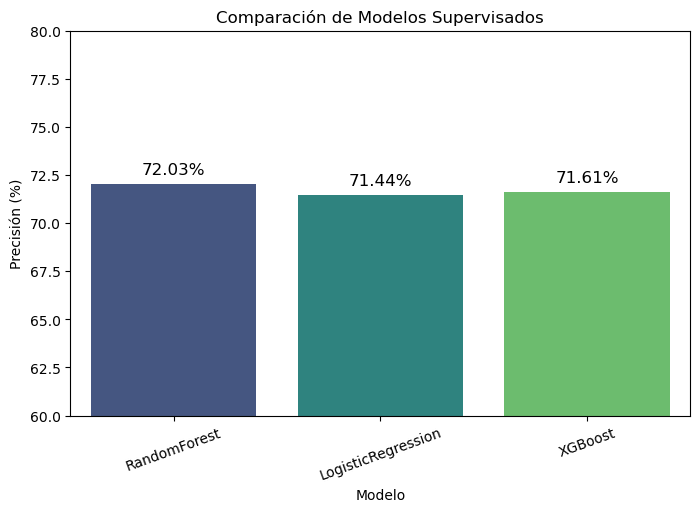

In [16]:
# División de datos
x = df_Normalizado.drop('Alzheimer’s Diagnosis', axis=1)
y = df_Normalizado['Alzheimer’s Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelos supervisados
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)  # Eliminamos use_label_encoder para evitar warning
}

# Entrenamiento y evaluación
scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    scores[name] = model.score(x_test, y_test) * 100

# DataFrame con los resultados
scores_df = pd.DataFrame(list(scores.items()), columns=["Modelo", "Precisión"])

# Configuración de la grafica
plt.figure(figsize=(8, 5))
sns.barplot(x="Modelo", y="Precisión", data=scores_df, palette="viridis")

plt.ylim(60, 80)
plt.ylabel("Precisión (%)")
plt.title("Comparación de Modelos Supervisados")
plt.xticks(rotation=20)

# Mostrar los valores
for index, value in enumerate(scores_df["Precisión"]):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha="center", fontsize=12)

plt.show()


### 4.2. Modelos no supervisados

Dado que el dataset que venimos trabajando cuenta con la columna de target, para los siguientes modelos dicha columna es eliminada

In [17]:
#Tratamiento del dataframe, se crean 2 clones de dicho df, ?df2' simplemente no incluye las columnas 'Country' 'Alzheimer’s Diagnosis', y en 'x_for_kmeans'
#se normalizan los valores
df2.drop(['Country', 'Alzheimer’s Diagnosis'], axis=1, inplace=True)
scaler = MinMaxScaler()
x_for_kmeans = scaler.fit_transform(df2)
x_for_kmeans

array([[0.90909091, 0.05263158, 0.87878788, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.36842105, 0.69090909, ..., 0.        , 1.        ,
        1.        ],
       [0.81818182, 1.        , 0.26666667, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.15909091, 0.68421053, 0.58787879, ..., 1.        , 0.        ,
        0.        ],
       [0.52272727, 0.36842105, 0.63636364, ..., 0.        , 1.        ,
        0.        ],
       [0.15909091, 0.05263158, 0.8       , ..., 1.        , 0.        ,
        1.        ]])

In [18]:
# se aplica gridsearch para intentar mejorar la calidad del modelo

# def silhouette_scorer(estimator, X):
#     labels = estimator.fit_predict(X)
#     return silhouette_score(X, labels)

# param_grid = {
#     "init": ["random", "k-means++"],
#     "max_iter": [100, 300, 500],
#     "n_init": [10, 20, 30],
#     "algorithm": ["lloyd", "elkan"]
# }

# kmeans = KMeans(n_clusters=2, random_state=42)
# grid_search = GridSearchCV(kmeans, param_grid, scoring=make_scorer(silhouette_scorer), cv=3, verbose=1, n_jobs=-1)

# grid_search.fit(x_for_kmeans)


# print("Mejores parámetros:", grid_search.best_params_)
# print("Mejor Silhouette Score:", grid_search.best_score_)

In [19]:
#instanciamiento de un modelo por cada dataframe, y respectivo ajuste a su data
kmeans = KMeans(n_clusters=2, algorithm='lloyd', init='random', max_iter=100, n_init=10, random_state=1)
kmeans.fit(df2)

kmeans_scaled = KMeans(n_clusters=2, algorithm='lloyd', init='random', max_iter=100, n_init=10, random_state=1)
kmeans_scaled.fit(x_for_kmeans)


KMeans(init='random', max_iter=100, n_clusters=2, n_init=10, random_state=1)

In [20]:
#recuento de valores por categoria
km = pd.Series(kmeans.labels_)
km_scaled = pd.Series(kmeans_scaled.labels_)
count_values = km.value_counts()
count_values2 = km_scaled.value_counts()
print('dataset original\n',df.value_counts(df['Alzheimer’s Diagnosis']), '\n\ncategorización por k-means (no escalado)\n',count_values, 
      '\n\ncategorización por k-means(escalado)\n', count_values2,)

dataset original
 Alzheimer’s Diagnosis
0    43570
1    30713
Name: count, dtype: int64 

categorización por k-means (no escalado)
 1    37324
0    36959
Name: count, dtype: int64 

categorización por k-means(escalado)
 0    49114
1    25169
Name: count, dtype: int64


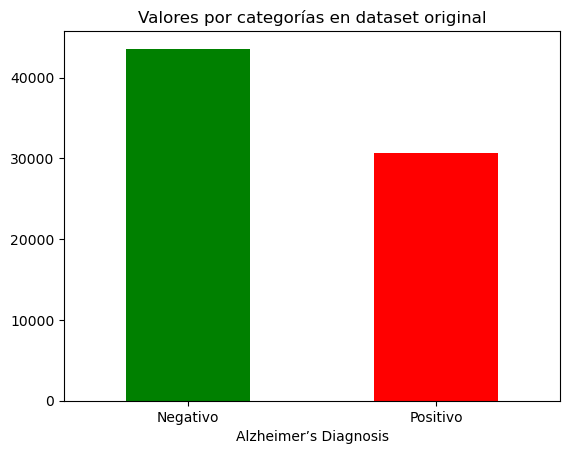

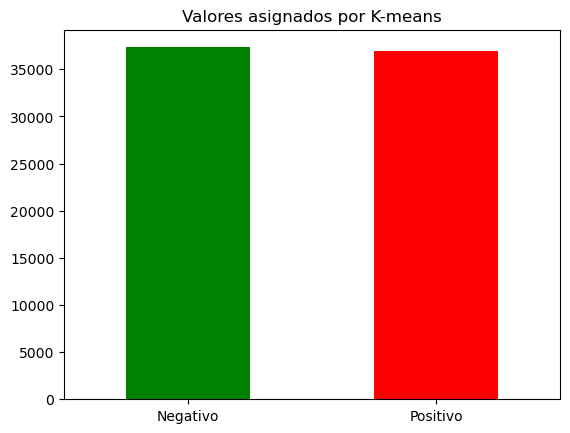

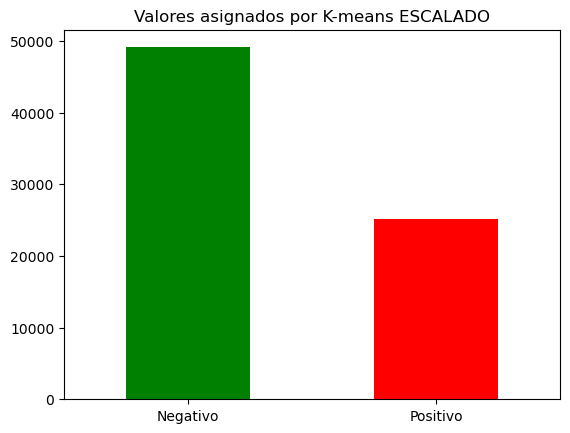

In [ ]:
#grafica del recuento anterior
count_values_og = df.value_counts(df['Alzheimer’s Diagnosis'])
count_values_og.plot(kind='bar',color=['green','red' ], title='Valores por categorías en dataset original')
plt.xticks(ticks=[0, 1], labels=["Negativo", "Positivo"])
plt.xticks(rotation=0)
plt.show()

count_values.plot(kind='bar',color=['green','red' ], title='Valores asignados por K-means')
plt.xticks(ticks=[0, 1], labels=["Negativo", "Positivo"])
plt.xticks(rotation=0)
plt.show()

count_values2.plot(kind='bar',color=['green','red' ], title='Valores asignados por K-means ESCALADO')
plt.xticks(ticks=[0, 1], labels=["Negativo", "Positivo"])
plt.xticks(rotation=0)





plt.show()

## 5. Optinización y comparación de modelos 

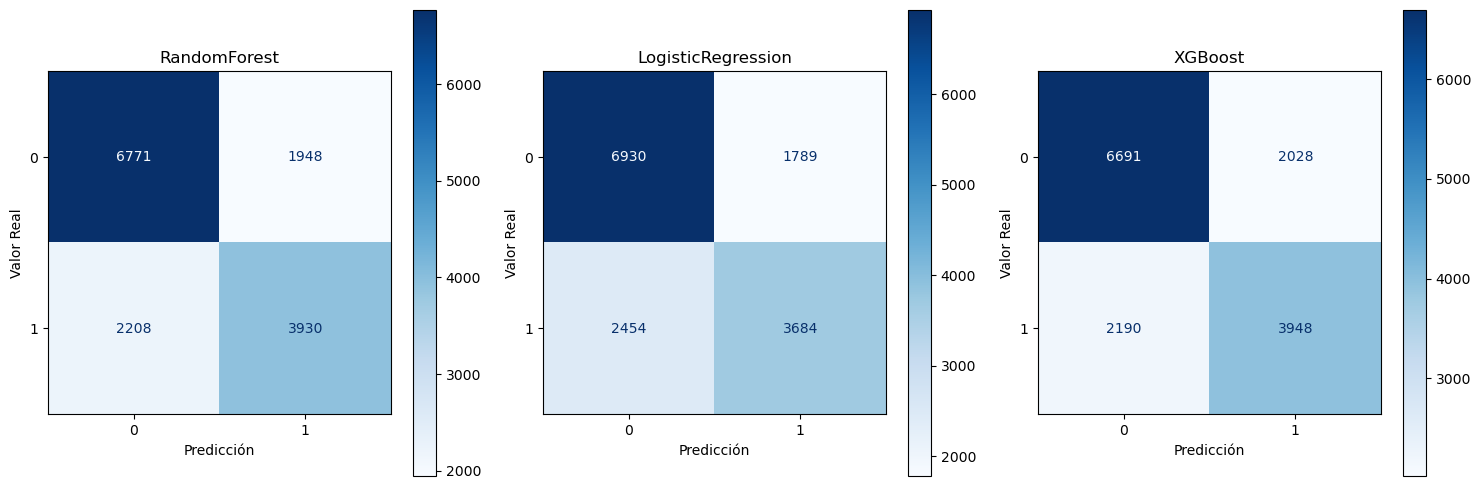

In [38]:
#Gráfica de la matriz de confusión Modelos Supervisados
fig, labels = plt.subplots(1, 3, figsize=(15, 5))

custom_cmap = plt.cm.Blues
for ax, (name, model) in zip(labels, models.items()):
    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap=custom_cmap)
    disp.ax_.set_title(name)
    disp.ax_.set_xlabel("Predicción")
    disp.ax_.set_ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [37]:
#Calculo de metricas

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"Modelo: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Modelo: RandomForest
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      8719
           1       0.67      0.64      0.65      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.71      0.71     14857
weighted avg       0.72      0.72      0.72     14857

--------------------------------------------------
Modelo: LogisticRegression
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      8719
           1       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857

--------------------------------------------------
Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      8719
           1       0.66      0.64      0.65      6138

    accuracy    

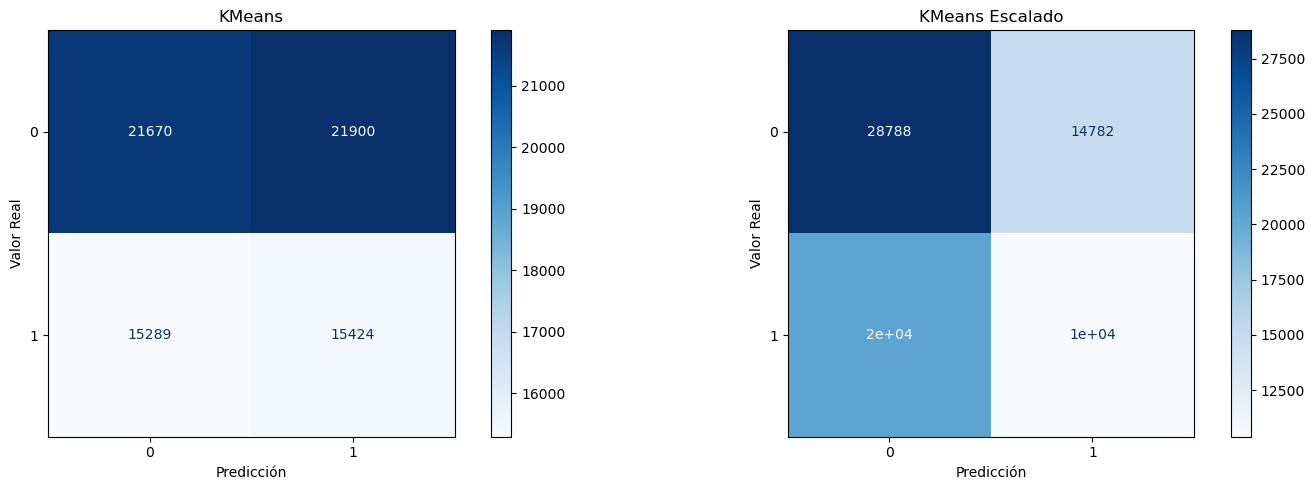

In [40]:
#Matriz de confusión modelos no supervisados
fig, labels = plt.subplots(1, 2, figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(df['Alzheimer’s Diagnosis'], km), display_labels=["0", "1"])
disp.plot(ax=labels[0], cmap='Blues')
disp.ax_.set_title("KMeans")
disp.ax_.set_xlabel("Predicción")
disp.ax_.set_ylabel("Valor Real")

disp = ConfusionMatrixDisplay(confusion_matrix(df['Alzheimer’s Diagnosis'], km_scaled), display_labels=["0", "1"])
disp.plot(ax=labels[1], cmap='Blues')
disp.ax_.set_title("KMeans Escalado")
disp.ax_.set_xlabel("Predicción")
disp.ax_.set_ylabel("Valor Real")
plt.tight_layout()
plt.show()



In [41]:
#Calculo de metricas
print("KMeans")
print(classification_report(df['Alzheimer’s Diagnosis'], km))
print("-" * 50)
print("KMeans Escalado")
print(classification_report(df['Alzheimer’s Diagnosis'], km_scaled))
print("-" * 50)


KMeans
              precision    recall  f1-score   support

           0       0.59      0.50      0.54     43570
           1       0.41      0.50      0.45     30713

    accuracy                           0.50     74283
   macro avg       0.50      0.50      0.50     74283
weighted avg       0.51      0.50      0.50     74283

--------------------------------------------------
KMeans Escalado
              precision    recall  f1-score   support

           0       0.59      0.66      0.62     43570
           1       0.41      0.34      0.37     30713

    accuracy                           0.53     74283
   macro avg       0.50      0.50      0.50     74283
weighted avg       0.51      0.53      0.52     74283

--------------------------------------------------
